#### Task 0 -Loading Libraries

In [1]:
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR


Current working directory: C:\Users\YOGITA\Python\desktop\YS\NITW\Mid-proj 01


### Task 1

#### 1) Preparing data



#### 1.1) Loading Training and Testing data

In [227]:
cab_train = pd.read_csv(r'C:\Users\YOGITA\Python\desktop\YS\NITW\Mid-proj 01\Dataset\train.csv')
cab_test = pd.read_csv(r'C:\Users\YOGITA\Python\desktop\YS\NITW\Mid-proj 01\Dataset\test.csv')

cab_train_label=pd.read_csv(r'C:\Users\YOGITA\Python\desktop\YS\NITW\Mid-proj 01\Dataset\train_label.csv',names=['Total_booking'])
cab_test_label=pd.read_csv(r'C:\Users\YOGITA\Python\desktop\YS\NITW\Mid-proj 01\Dataset\test_label.csv',names=['Total_booking'])

#### 1.2) Overview of the data

In [228]:
print(cab_train.head())
cab_train_label.head()

           datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  
0  25.760        77    16.9979  
1  33.335        79    19.0012  
2   6.060        50    22.0028  
3  16.665        29     8.9981  
4  33.335        51    19.0012  


,Total_booking
0,504
1,5
2,139
3,209
4,184


In [229]:
## size of df =total number of elements = num of rows * num of columns

print(cab_train.size)
print(cab_train_label.size)

78372
8708


In [230]:
#shape of df =(rows, columns)

print(cab_train.shape)
print(cab_train_label.shape)

(8708, 9)
(8708, 1)


In [231]:
#Here we expect- number of rows =num of labels
#But as we have header row in cab_train but not in cab_Train_label, thus we can see this discrepancy.
#(8708, 9)
#(8707, 1)
#Best way is to add names while loading csv file.

print(cab_train_label.head())
print(cab_test_label.head())

   Total_booking
0            504
1              5
2            139
3            209
4            184
   Total_booking
0            256
1             87
2             11
3             84
4            668


In [232]:
# dimension of df - Returns dimension of dataframe/series. 1 for one dimension (series- as it have 1 column and all rows),
#2 for two dimension (dataframe)

print(cab_train.ndim)
print(cab_train_label.ndim)

2
2


In [233]:
# similarly we can check for test data

#size
print(cab_test.size)
print(cab_test_label.size)

#shape
print(cab_test.shape)
print(cab_test_label.shape)

#dimension
print(cab_test.ndim)
print(cab_test_label.ndim)

19602
2178
(2178, 9)
(2178, 1)
2
2


#### 1.3) Add cab_train_label column to cab_train df and cab_test_label column to cab_test df to create a new df

In [234]:
cab_train = pd.concat([cab_train,cab_train_label], axis=1)

print(cab_train.head())
print(cab_train.columns)

cab_test_01 = pd.concat([cab_test,cab_test_label], axis=1)

print(cab_test_01.head())
print(cab_test_01.columns)



           datetime  season  holiday  workingday              weather   temp  \
0    5/2/2012 19:00  Summer        0           1   Clear + Few clouds  22.14   
1     9/5/2012 4:00    Fall        0           1   Clear + Few clouds  28.70   
2    1/13/2011 9:00  Spring        0           1   Clear + Few clouds   5.74   
3  11/18/2011 16:00  Winter        0           1   Clear + Few clouds  13.94   
4   9/13/2011 13:00    Fall        0           1   Clear + Few clouds  30.34   

    atemp  humidity  windspeed  Total_booking  
0  25.760        77    16.9979            504  
1  33.335        79    19.0012              5  
2   6.060        50    22.0028            139  
3  16.665        29     8.9981            209  
4  33.335        51    19.0012            184  
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'Total_booking'],
      dtype='object')
           datetime  season  holiday  workingday                  weather  \


#### 1.4) Convert datetime column to proper python datetime type

In [235]:
#datetime column is present as string or object, so we will first convert it to datetime dtype

#as we can see, diff date formats (all as object) are used in 1 column, so we will convert them all in one datetime format.

print(cab_train.dtypes)
cab_test.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object


datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object

In [236]:
cab_train['datetime'] = cab_train['datetime'].apply(pd.to_datetime)
cab_test['datetime'] = cab_test['datetime'].apply(pd.to_datetime)

print(cab_test_01.dtypes)
cab_train.dtypes

datetime          object
season            object
holiday            int64
workingday         int64
weather           object
temp             float64
atemp            float64
humidity           int64
windspeed        float64
Total_booking      int64
dtype: object


datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
dtype: object

In [146]:
##above method have converted all dates to one format

cab_train['datetime'].head(20)

0    2012-05-02 19:00:00
1    2012-09-05 04:00:00
2    2011-01-13 09:00:00
3    2011-11-18 16:00:00
4    2011-09-13 13:00:00
5    2012-08-17 17:00:00
6    2012-10-06 09:00:00
7    2012-09-10 04:00:00
8    2012-07-14 04:00:00
9    2011-02-06 18:00:00
10   2012-01-17 15:00:00
11   2012-09-10 20:00:00
12   2011-03-13 13:00:00
13   2012-06-14 09:00:00
14   2012-02-09 14:00:00
15   2011-09-19 23:00:00
16   2012-10-06 11:00:00
17   2011-02-18 08:00:00
18   2011-10-09 19:00:00
19   2012-06-12 01:00:00
Name: datetime, dtype: datetime64[ns]

#### 1.5) Add Features which can help in predicition (hour, weekday, month)

In [237]:
cab_train['Hour'] = cab_train['datetime'].dt.hour
cab_train['Weekday']=cab_train['datetime'].dt.day_name()

cab_train['Month']=cab_train['datetime'].dt.month_name()

print(cab_train.dtypes)

##test

cab_test['Hour'] = cab_test['datetime'].dt.hour
cab_test['Weekday']=cab_test['datetime'].dt.day_name()

cab_test['Month']=cab_test['datetime'].dt.month_name()

cab_test.dtypes

datetime         datetime64[ns]
season                   object
holiday                   int64
workingday                int64
weather                  object
temp                    float64
atemp                   float64
humidity                  int64
windspeed               float64
Total_booking             int64
Hour                      int64
Weekday                  object
Month                    object
dtype: object


datetime      datetime64[ns]
season                object
holiday                int64
workingday             int64
weather               object
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
Hour                   int64
Weekday               object
Month                 object
dtype: object

### Task 2

#### 2.1) Missing value analysis

In [238]:
print(cab_train.isnull().sum())

cab_test.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Hour             0
Weekday          0
Month            0
dtype: int64


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
Hour          0
Weekday       0
Month         0
dtype: int64

In [ ]:
# as we can see, none of the column have null values.

#### 2.2) Outlier Analysis

##### 2.2.1) Box plot

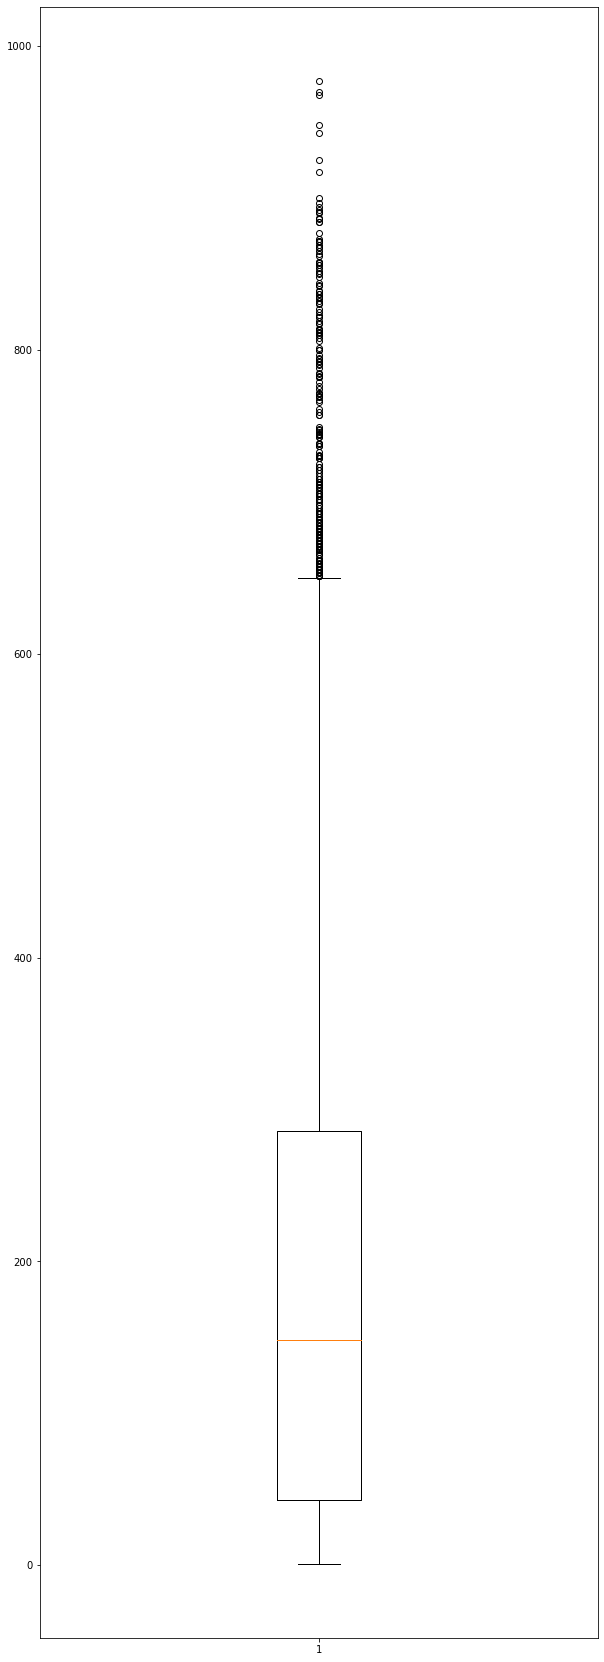

In [148]:
fig = plt.figure(figsize =(10, 30))
 
# Creating plot
plt.boxplot(cab_train['Total_booking'])
 
# show plot
plt.show()

In [149]:
## as we can see from this box plot, values above 650 seems to be outlier

cab_train[cab_train['Total_booking']<650]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Weekday,Month
0,2012-05-02 19:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,19,Wednesday,May
1,2012-09-05 04:00:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,4,Wednesday,September
2,2011-01-13 09:00:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,9,Thursday,January
3,2011-11-18 16:00:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,16,Friday,November
4,2011-09-13 13:00:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,13,Tuesday,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8703,2012-01-16 06:00:00,Spring,1,0,Clear + Few clouds,4.10,6.820,54,6.0032,13,6,Monday,January
8704,2011-11-10 01:00:00,Winter,0,1,Mist + Cloudy,16.40,20.455,87,0.0000,11,1,Thursday,November
8705,2011-04-12 03:00:00,Summer,0,1,Mist + Cloudy,23.78,27.275,56,8.9981,1,3,Tuesday,April
8706,2012-11-07 01:00:00,Winter,0,1,Mist + Cloudy,11.48,13.635,61,16.9979,92,1,Wednesday,November


In [150]:
cab_train[cab_train['Total_booking']>650]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Weekday,Month
5,2012-08-17 17:00:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,17,Friday,August
27,2012-05-02 18:00:00,Summer,0,1,Clear + Few clouds,22.96,26.515,73,15.0013,813,18,Wednesday,May
30,2012-07-10 17:00:00,Fall,0,1,Clear + Few clouds,31.98,35.605,49,12.9980,872,17,Tuesday,July
52,2012-06-05 18:00:00,Summer,0,1,Clear + Few clouds,24.60,31.060,43,12.9980,790,18,Tuesday,June
70,2012-05-18 18:00:00,Summer,0,1,Clear + Few clouds,26.24,31.060,38,15.0013,669,18,Friday,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,2012-03-14 08:00:00,Spring,0,1,Clear + Few clouds,18.04,21.970,82,0.0000,662,8,Wednesday,March
8582,2012-10-15 08:00:00,Winter,0,1,Mist + Cloudy,24.60,30.305,64,26.0027,737,8,Monday,October
8676,2012-05-12 13:00:00,Summer,0,0,Clear + Few clouds,26.24,31.060,36,12.9980,659,13,Saturday,May
8681,2012-08-08 17:00:00,Fall,0,1,Mist + Cloudy,32.80,37.880,55,19.0012,858,17,Wednesday,August


In [ ]:
#242 rows are quite large and i don't think it will be wise to remove them all!!!!!

#we are not very sure here, about how to handle these outlier values.
#so let's do some more analysis.



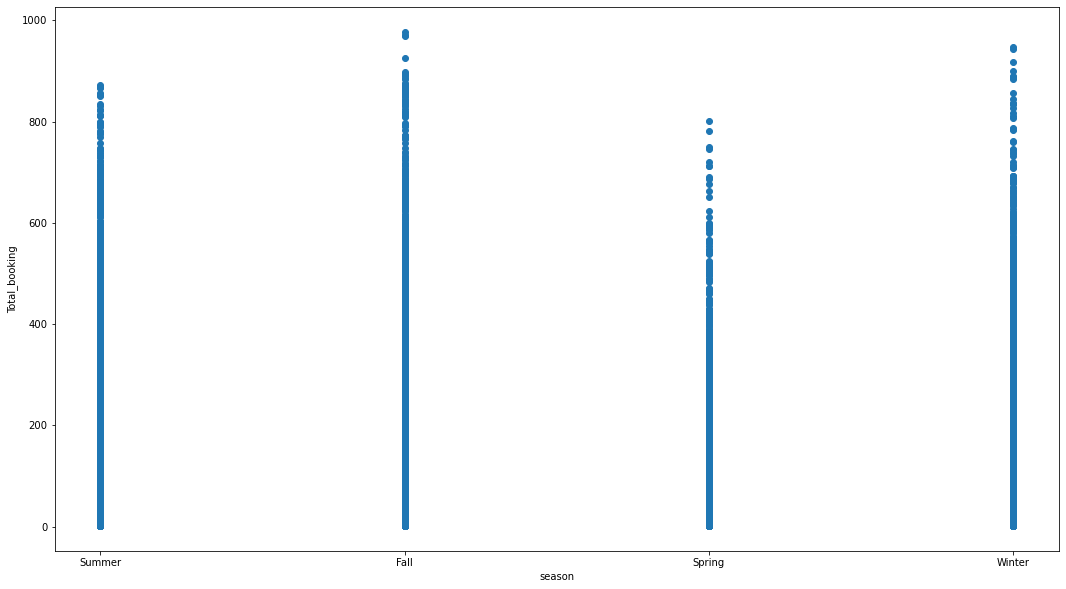

In [151]:
## scatter plot between Total_booking and season
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train['season'],cab_train['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('season')
plt.show()


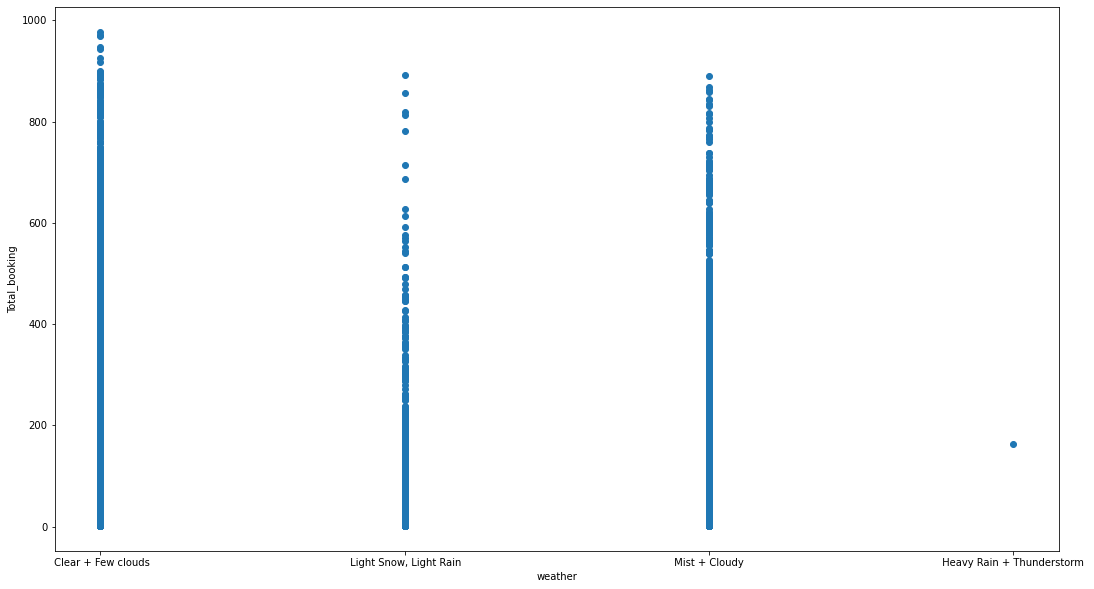

In [152]:
## scatter plot between Total_booking and weather

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train['weather'],cab_train['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('weather')
plt.show()

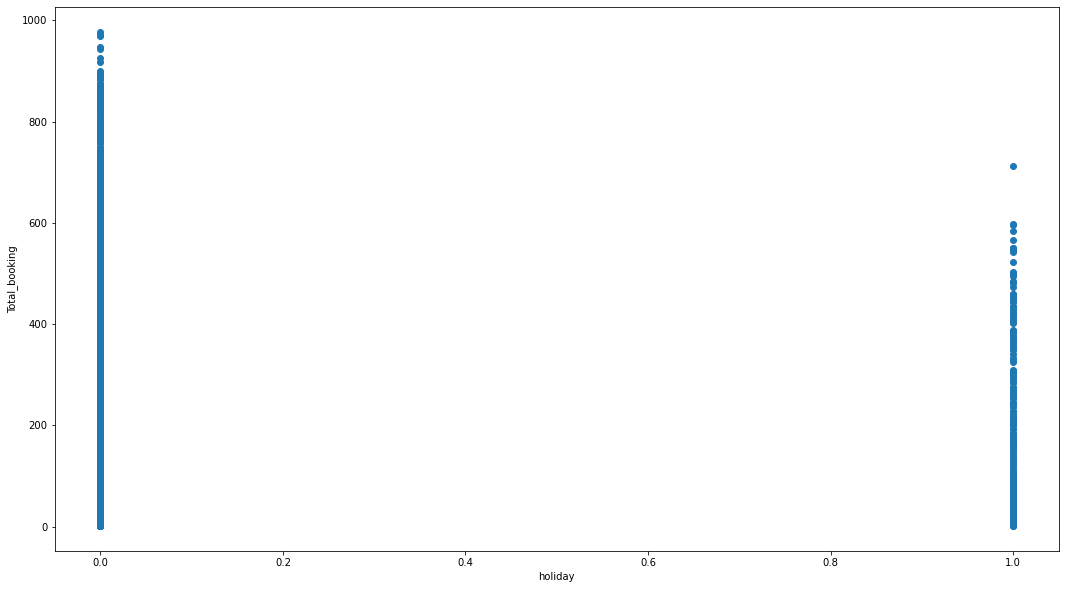

In [153]:
## scatter plot between Total_booking and holiday

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train['holiday'],cab_train['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('holiday')
plt.show()

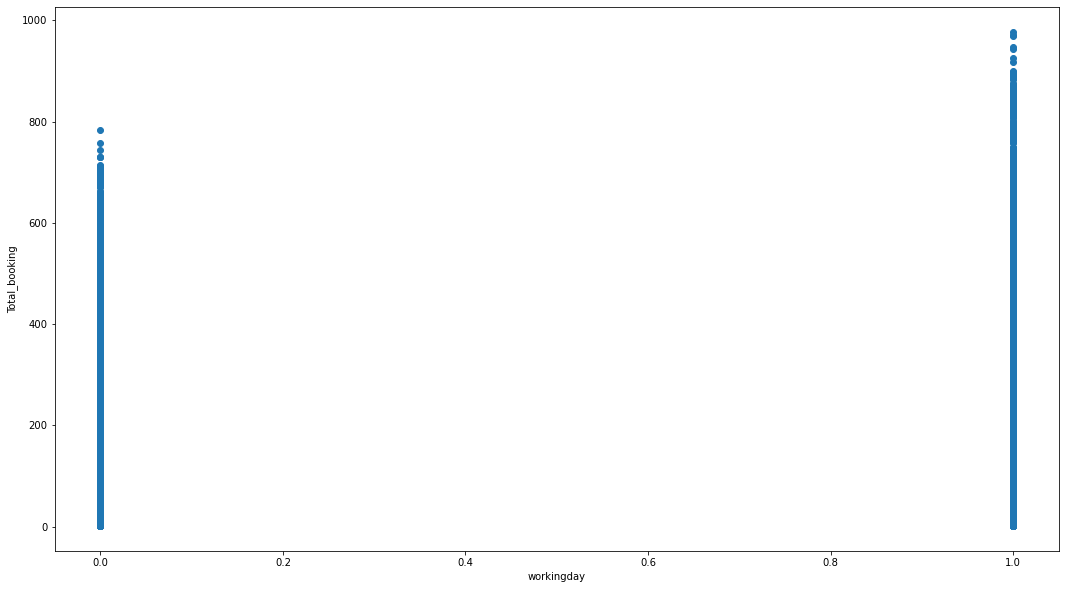

In [154]:
## scatter plot between Total_booking and working day

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train['workingday'],cab_train['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('workingday')
plt.show()

In [155]:
cab_train[cab_train['Total_booking']>950]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Weekday,Month
566,2012-09-12 18:00:00,Fall,0,1,Clear + Few clouds,27.06,31.06,44,16.9979,977,18,Wednesday,September
3441,2012-09-10 18:00:00,Fall,0,1,Clear + Few clouds,25.42,31.06,35,19.9995,968,18,Monday,September
8299,2012-09-11 17:00:00,Fall,0,1,Clear + Few clouds,28.70,31.82,28,0.0000,970,17,Tuesday,September


In [156]:
cab_train[cab_train['Total_booking']>900]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Weekday,Month
510,2012-10-16 17:00:00,Winter,0,1,Clear + Few clouds,21.32,25.000,39,12.9980,943,17,Tuesday,October
566,2012-09-12 18:00:00,Fall,0,1,Clear + Few clouds,27.06,31.060,44,16.9979,977,18,Wednesday,September
2963,2012-09-12 17:00:00,Fall,0,1,Clear + Few clouds,28.70,31.820,41,19.9995,925,17,Wednesday,September
3441,2012-09-10 18:00:00,Fall,0,1,Clear + Few clouds,25.42,31.060,35,19.9995,968,18,Monday,September
4773,2012-10-03 17:00:00,Winter,0,1,Clear + Few clouds,28.70,32.575,65,0.0000,917,17,Wednesday,October
4853,2012-10-10 17:00:00,Winter,0,1,Clear + Few clouds,23.78,27.275,43,15.0013,948,17,Wednesday,October
8299,2012-09-11 17:00:00,Fall,0,1,Clear + Few clouds,28.70,31.820,28,0.0000,970,17,Tuesday,September


In [157]:
## so we conclude that values of total_booking are outliers
cab_train_01=cab_train[cab_train['Total_booking']<900]
cab_train_01.shape

(8700, 13)

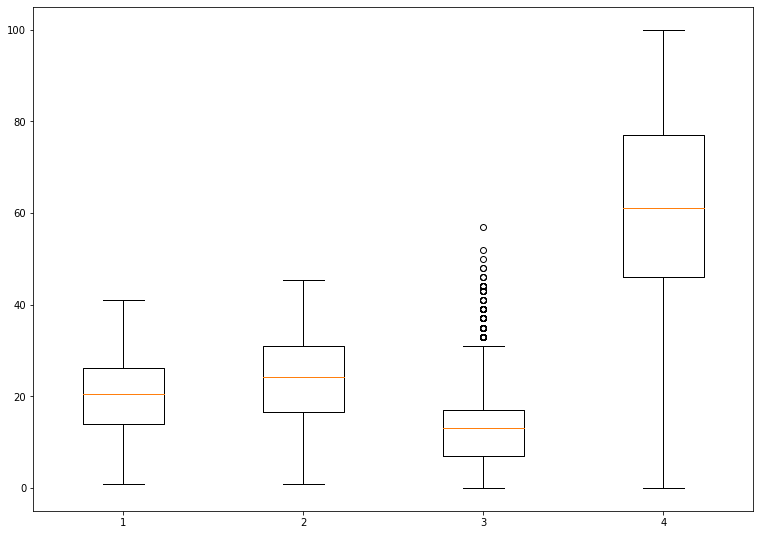

In [158]:
## Box plot for temp, atemp, windspeed,humidity

data=[cab_train_01['temp'],cab_train_01['atemp'],cab_train_01['windspeed'],cab_train_01['humidity']]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

In [159]:
#here we are able to see some outliers in windspeed column

cab_train_01[cab_train_01['windspeed']>35]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Hour,Weekday,Month
105,2012-09-18 08:00:00,Fall,0,1,Mist + Cloudy,27.06,30.305,83,36.9974,672,8,Tuesday,September
182,2012-01-18 06:00:00,Spring,0,1,Clear + Few clouds,13.94,14.395,36,35.0008,88,6,Wednesday,January
279,2012-04-09 12:00:00,Summer,0,1,Clear + Few clouds,22.14,25.760,28,47.9988,280,12,Monday,April
288,2011-02-19 10:00:00,Spring,0,0,Clear + Few clouds,17.22,21.210,16,39.0007,106,10,Saturday,February
316,2012-01-18 04:00:00,Spring,0,1,Clear + Few clouds,13.94,14.395,46,35.0008,1,4,Wednesday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,2012-04-09 14:00:00,Summer,0,1,Clear + Few clouds,22.96,26.515,28,36.9974,218,14,Monday,April
8468,2011-02-19 21:00:00,Spring,0,0,Clear + Few clouds,13.12,13.635,26,36.9974,33,21,Saturday,February
8555,2011-02-08 10:00:00,Spring,0,1,Clear + Few clouds,9.02,9.090,47,36.9974,48,10,Tuesday,February
8603,2012-01-13 13:00:00,Spring,0,1,Clear + Few clouds,10.66,10.605,33,35.0008,154,13,Friday,January


In [160]:
print(cab_train_01['windspeed'].max())
print(cab_train_01['windspeed'].min())
cab_train_01['windspeed'].mean()

56.9969
0.0


12.84466703448298

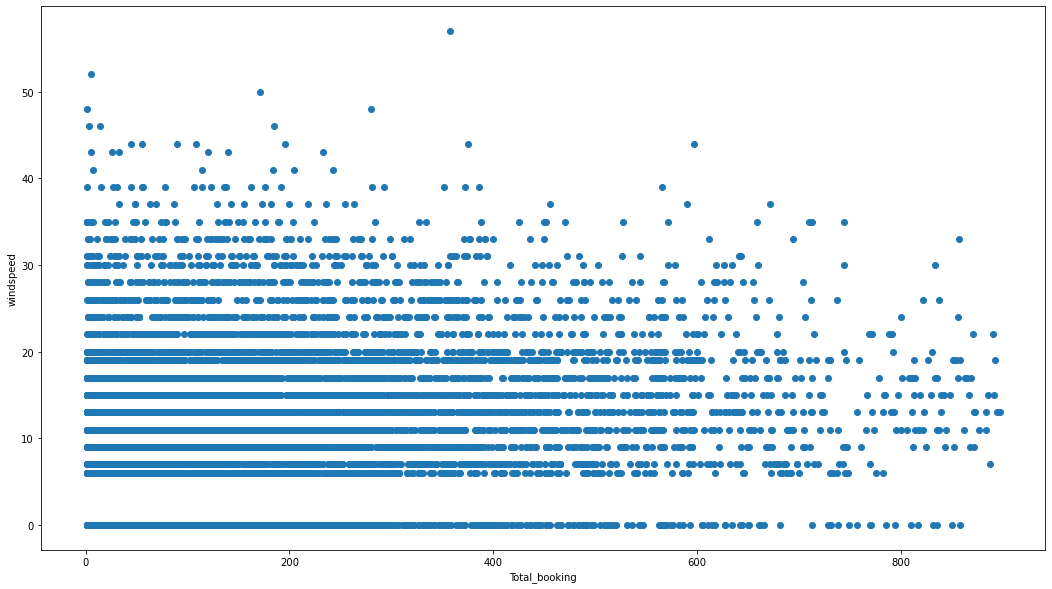

In [161]:
## scatter plot between Total_booking and windspeed

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_01['Total_booking'],cab_train_01['windspeed'])

# x-axis label
ax.set_xlabel('Total_booking')

# y-axis label
ax.set_ylabel('windspeed')
plt.show()

In [162]:
len(cab_train_01[cab_train_01['windspeed']>40])

26

In [239]:
cab_train_02= cab_train_01[cab_train_01['windspeed']<40]
print(cab_train_02.shape)
print(cab_train.shape)


(8674, 13)
(8708, 13)


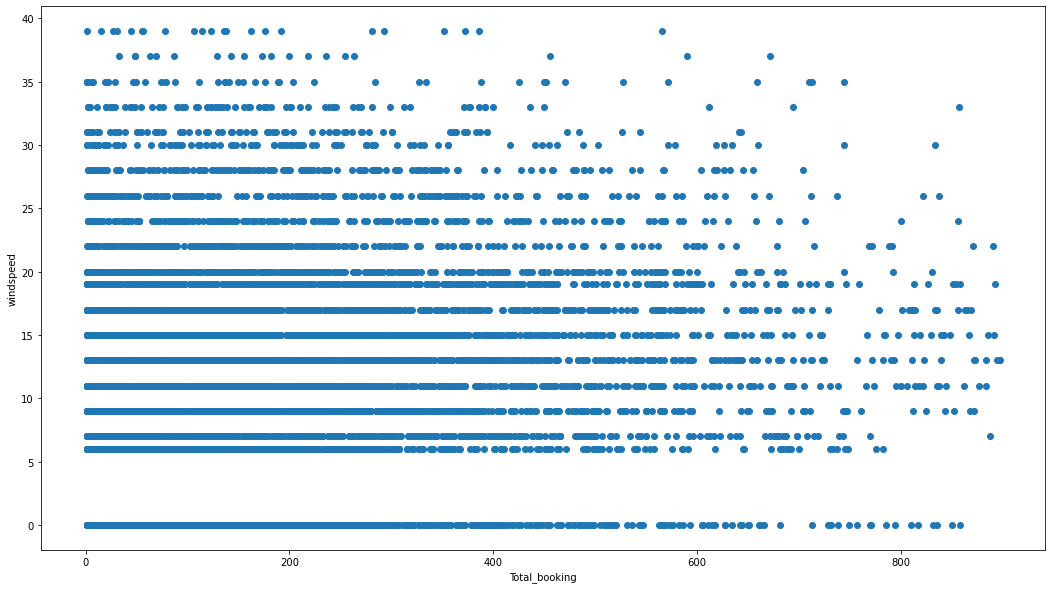

In [164]:
## scatter plot between Total_booking and windspeed

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_02['Total_booking'],cab_train_02['windspeed'])

# x-axis label
ax.set_xlabel('Total_booking')

# y-axis label
ax.set_ylabel('windspeed')
plt.show()

In [ ]:
#now data looks quite okay to me.

#### Task 3 Collinearity

##### 3.1) Multicollinearity (collinearity among features)

In [240]:
##correlation index

cab_train_02['holiday'].corr(cab_train_02['workingday'])



-0.2502666530200263

In [241]:
## negative correlation means , when one quantity increases, other will decrease

##here when holiday is 1 i.e it can't be a working day (i.e it will be 0). so both columns giving same values.
#so we will keep only working day column and will remove holiday column

cab_train_03=cab_train_02

del cab_train_03['holiday']
del cab_test['holiday']

In [167]:
cab_train_03.columns

Index(['datetime', 'season', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'Hour', 'Weekday', 'Month'],
      dtype='object')

In [242]:
#again datetime is no more useful to us, as we have Hour, weekday, month

del cab_train_03['datetime']
del cab_test['datetime']

In [168]:
cab_train_03.columns

Index(['datetime', 'season', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'Total_booking', 'Hour', 'Weekday', 'Month'],
      dtype='object')

In [169]:
# correlation index between temp and atemp

cab_train_03['temp'].corr(cab_train_03['atemp'])

0.9840697468229332

In [243]:
## as it's almost close to 1 i.e these two columns are positively correlated , so we will keep just temp col and not atemp

del cab_train_03['atemp']
del cab_test['atemp']
cab_train_03.columns

Index(['season', 'workingday', 'weather', 'temp', 'humidity', 'windspeed',
       'Total_booking', 'Hour', 'Weekday', 'Month'],
      dtype='object')

#### 3.2) Correlation among feature and label

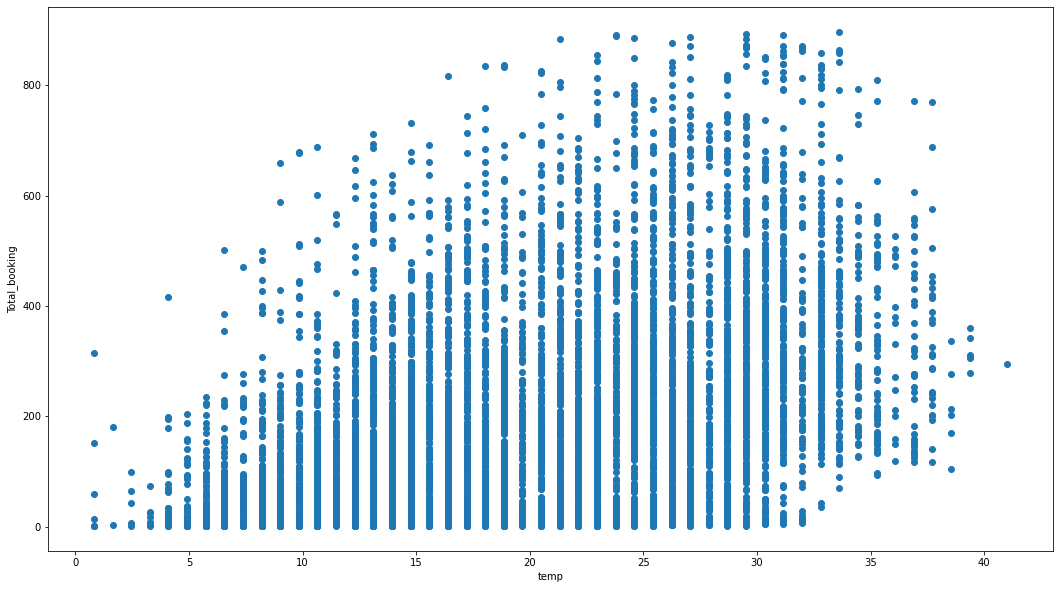

0.39708808543084

In [173]:
# correlation index between temp and Total_booking

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_03['temp'],cab_train_03['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('temp')
plt.show()

cab_train_03['temp'].corr(cab_train_03['Total_booking'])

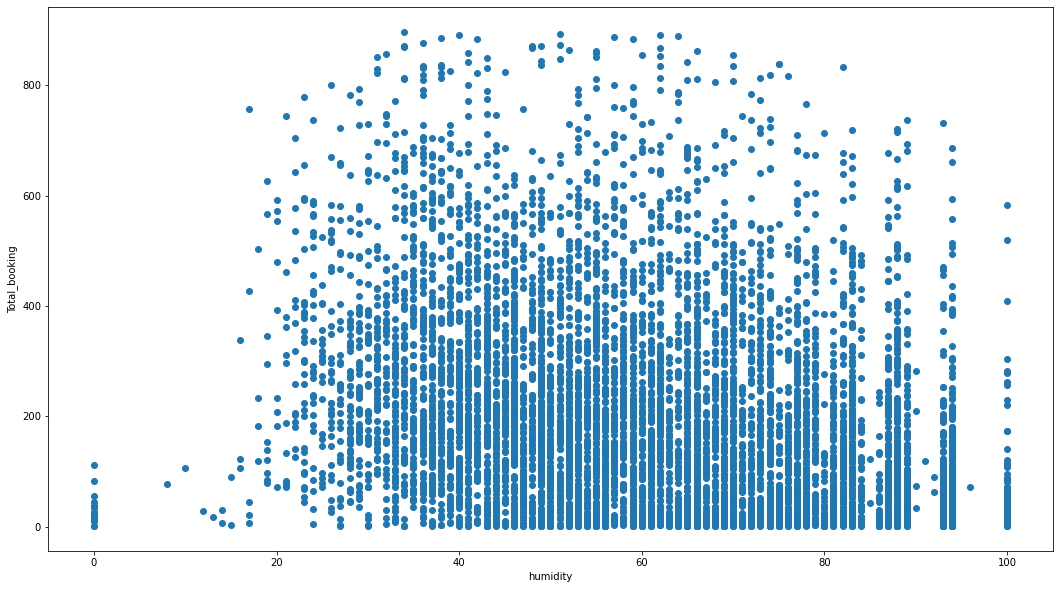

-0.3079190511320103

In [174]:
# correlation index between humidity and Total_booking

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_03['humidity'],cab_train_03['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('humidity')
plt.show()

cab_train_03['humidity'].corr(cab_train_03['Total_booking'])

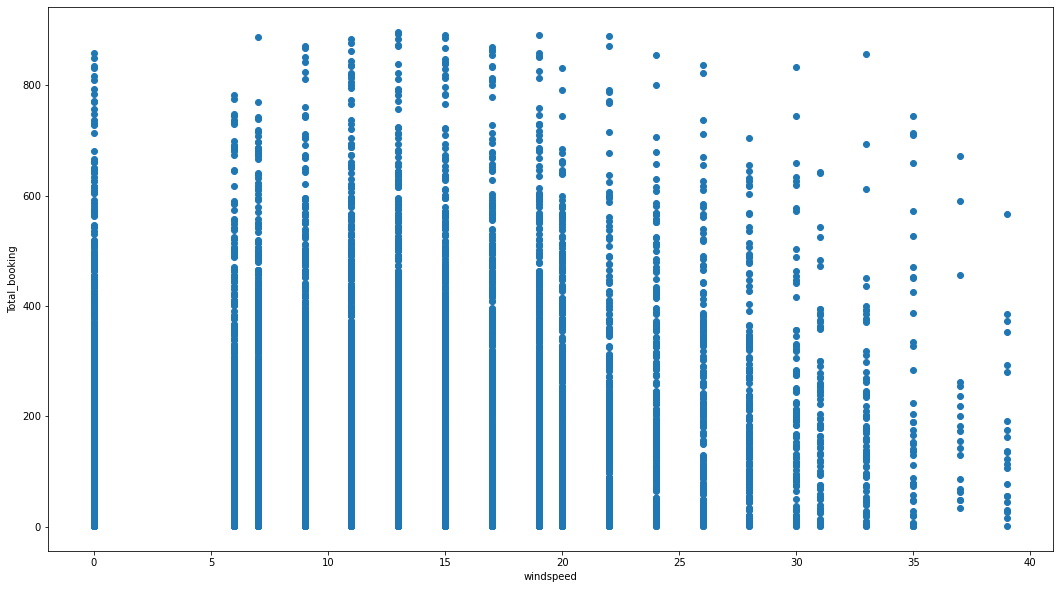

0.0985232492035808

In [175]:
# correlation index between windspeed and Total_booking

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_03['windspeed'],cab_train_03['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('windspeed')
plt.show()

cab_train_03['windspeed'].corr(cab_train_03['Total_booking'])

In [176]:
## this shows , windspeed is more strongly correlated to Total booking as compared to humidity and temperature.

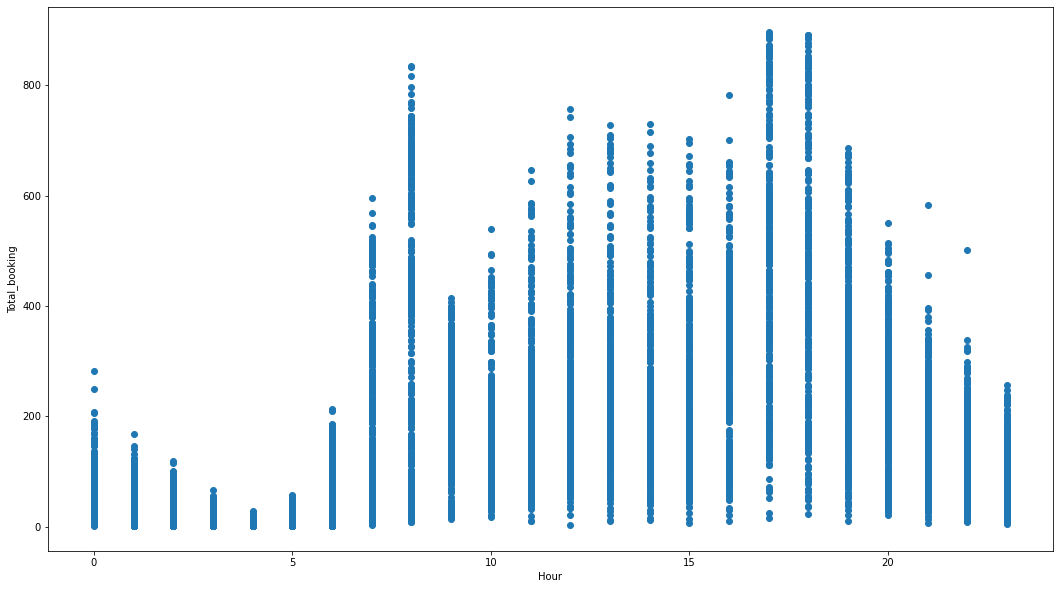

0.4004198837791952

In [178]:
# correlation index between hour and Total_booking

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_03['Hour'],cab_train_03['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('Hour')
plt.show()

cab_train_03['Hour'].corr(cab_train_03['Total_booking'])

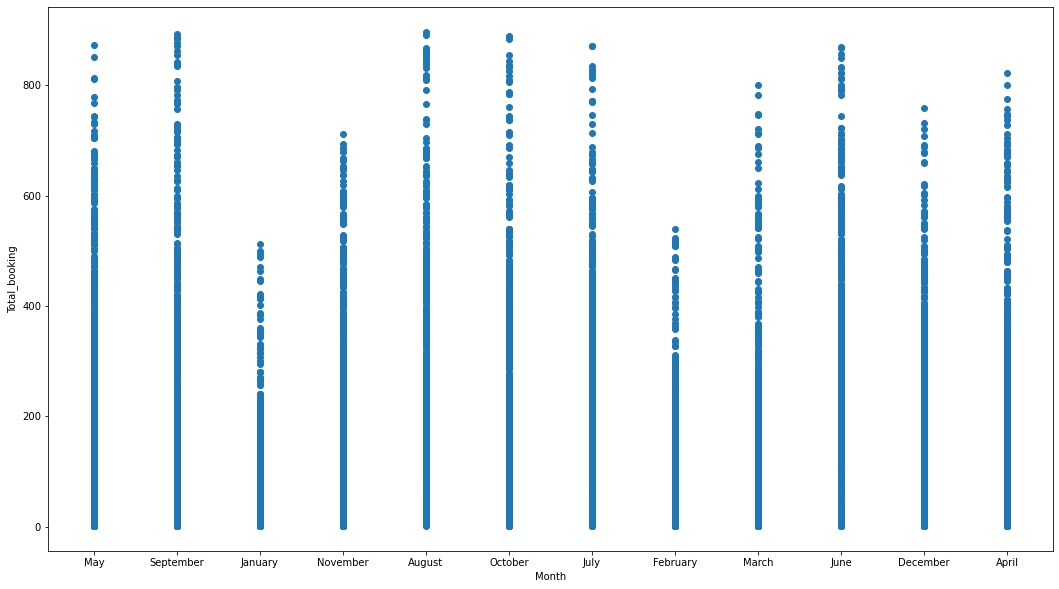

In [180]:
# correlation index between Month and Total_booking

# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(cab_train_03['Month'],cab_train_03['Total_booking'])

# x-axis label
ax.set_ylabel('Total_booking')

# y-axis label
ax.set_xlabel('Month')
plt.show()

# cab_train_03['Month'].corr(cab_train_03['Total_booking'])

#### Task 4) Normalization

In [185]:
#check whether Normalization is needed
cab_train_03.describe()

,workingday,temp,humidity,windspeed,Total_booking,Hour
count,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000,8674.000000
mean,0.680309,20.250427,61.719737,12.748976,192.456076,11.570556
std,0.466384,7.813076,19.163661,8.011673,180.288375,6.892725
min,0.000000,0.820000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,13.940000,47.000000,7.001500,43.000000,6.000000
50%,1.000000,20.500000,62.000000,12.998000,148.000000,12.000000
75%,1.000000,26.240000,77.000000,16.997900,286.000000,18.000000
max,1.000000,41.000000,100.000000,39.000700,897.000000,23.000000


In [189]:
#The different variables present different value ranges, therefore different magnitudes.
#Not only the minimum and maximum values are different, but they also spread over ranges of different widths.

#so let's Normalize the data

cab_train_03.columns

Index(['datetime', 'season', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'Total_booking', 'Hour', 'Weekday', 'Month'],
      dtype='object')

In [244]:
#we can keep only numerical features for normalization - so we hav to remove date column, cat columns and labeled column
cab_train_04 =cab_train_03[['temp','humidity','windspeed','Hour']]

# normalize the data attributes
normalized = preprocessing.normalize(cab_train_04)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.26332695 0.91581639 0.20216825 0.22598067]
 [0.33269385 0.91577751 0.2202642  0.04636848]
 [0.10312554 0.89830607 0.39530498 0.16169509]
 ...
 [0.38619704 0.90946318 0.14613287 0.04872124]
 [0.17836069 0.94773539 0.26409035 0.01553665]
 [0.10422715 0.90790202 0.36315173 0.1815804 ]]


In [245]:
# similarly for test data

#we can keep only numerical features for normalization - so we hav to remove date column, cat columns and labeled column
cab_test_02 =cab_test[['temp','humidity','windspeed','Hour']]

# normalize the data attributes
normalized1 = preprocessing.normalize(cab_test_02)
print("Normalized Data = ", normalized1)

Normalized Data =  [[0.3327759  0.74921403 0.54631438 0.17169488]
 [0.34469164 0.92768146 0.1014869  0.10146516]
 [0.10791957 0.94006591 0.26321187 0.18801318]
 ...
 [0.27449815 0.85871638 0.29108302 0.32019933]
 [0.17915649 0.97797389 0.09361603 0.05201989]
 [0.39764929 0.86502481 0.2227819  0.20970299]]


In [247]:
cab_train_05 =cab_train_03[[ 'season', 'workingday', 'weather','Total_booking','Weekday', 'Month']]

## merging numerical and non numerical df

cab_train_06 = pd.concat([cab_train_05,cab_train_04], axis=1)

print(cab_train_06.head())
print(cab_train_06.columns)


   season  workingday              weather  Total_booking    Weekday  \
0  Summer           1   Clear + Few clouds            504  Wednesday   
1    Fall           1   Clear + Few clouds              5  Wednesday   
2  Spring           1   Clear + Few clouds            139   Thursday   
3  Winter           1   Clear + Few clouds            209     Friday   
4    Fall           1   Clear + Few clouds            184    Tuesday   

       Month   temp  humidity  windspeed  Hour  
0        May  22.14        77    16.9979    19  
1  September  28.70        79    19.0012     4  
2    January   5.74        50    22.0028     9  
3   November  13.94        29     8.9981    16  
4  September  30.34        51    19.0012    13  
Index(['season', 'workingday', 'weather', 'Total_booking', 'Weekday', 'Month',
       'temp', 'humidity', 'windspeed', 'Hour'],
      dtype='object')


In [249]:
## test data

cab_test_03 =cab_test[[ 'season', 'workingday', 'weather','Weekday', 'Month']]

## merging numerical and non numerical df

cab_test_04 = pd.concat([cab_test_03,cab_test_02], axis=1)

print(cab_test_04.head())
print(cab_test_04.columns)


   season  workingday                  weather   Weekday    Month   temp  \
0  Summer           1       Clear + Few clouds  Thursday      May  21.32   
1  Summer           0       Clear + Few clouds  Saturday     June  23.78   
2  Spring           0   Light Snow, Light Rain    Sunday    March  11.48   
3  Winter           1           Mist + Cloudy   Thursday  October  25.42   
4  Summer           0       Clear + Few clouds  Saturday     June  25.42   

   humidity  windspeed  Hour  
0        48    35.0008    11  
1        64     7.0015     7  
2       100    27.9993    20  
3        83     0.0000    11  
4        43    23.9994    12  
Index(['season', 'workingday', 'weather', 'Weekday', 'Month', 'temp',
       'humidity', 'windspeed', 'Hour'],
      dtype='object')


#### Task 5) Set Categorical columns as 'categorical' -season, holiday, working day, weather

#### 5.1 verify if above columns are categorical columns

In [250]:
#### 5.1 verify if above columns are categorical columns

cat_col_unique_val= {'season':4, 'workingday':2, 'weather':4}

cat_Col=[col for col in cat_col_unique_val.keys() if len(cab_train_06[col]. unique()) ==cat_col_unique_val[col] ]
print(cat_Col)

['season', 'workingday', 'weather']


In [251]:
#this also confirms - above cat columns doesn't have null values

print(cab_train_06['season'].unique())
# print(cab_train['holiday'].unique())
print(cab_train_06['workingday'].unique())
print(cab_train_06['weather'].unique())

['Summer' 'Fall' 'Spring' 'Winter']
[1 0]
[' Clear + Few clouds' ' Light Snow, Light Rain' ' Mist + Cloudy '
 ' Heavy Rain + Thunderstorm ']


#### 5.2) # now we will set these categorical columns as 'categorical'

In [252]:
# now we will set these categorical columns as 'categorical'

print(cab_train_06.dtypes)

cab_train_06['season']=pd.Categorical(cab_train_03['season'])
# cab_train['holiday']=pd.Categorical(cab_train['holiday'])
cab_train_06['workingday']=cab_train_06['workingday'].astype('category')
cab_train_06['weather']=cab_train_06['weather'].astype('category')

print(cab_train_06.dtypes)


### test data

cab_test_04['season']=pd.Categorical(cab_test_04['season'])
# cab_train['holiday']=pd.Categorical(cab_train['holiday'])
cab_test_04['workingday']=cab_test_04['workingday'].astype('category')
cab_test_04['weather']=cab_test_04['weather'].astype('category')


season            object
workingday         int64
weather           object
Total_booking      int64
Weekday           object
Month             object
temp             float64
humidity           int64
windspeed        float64
Hour               int64
dtype: object
season           category
workingday       category
weather          category
Total_booking       int64
Weekday            object
Month              object
temp              float64
humidity            int64
windspeed         float64
Hour                int64
dtype: object


#### 5.3) Label Encoding

In [265]:
#creating an instance of label encoder
label_encoder=LabelEncoder()

# Assigning numerical values and storing it in another column called season_N
cab_train_06['season_N']=label_encoder.fit_transform(cab_train_06['season'])

#Assigning numerical values and storing it in another column called weather_N
cab_train_06['weather_N']=label_encoder.fit_transform(cab_train_06['weather'])

#Assigning numerical values and storing it in another column called Weekday_N
cab_train_06['Weekday_N']=label_encoder.fit_transform(cab_train_06['Weekday'])

#Assigning numerical values and storing it in another column called Month_N
cab_train_06['Month_N']=label_encoder.fit_transform(cab_train_06['Month'])

cab_train_06.head()


,workingday,Total_booking,Month,temp,humidity,windspeed,Hour,season_N,weather_N,Weekday_N,Month_N
0,1,504,May,22.14,77,16.9979,19,2,0,6,8
1,1,5,September,28.70,79,19.0012,4,0,0,6,11
2,1,139,January,5.74,50,22.0028,9,1,0,4,4
3,1,209,November,13.94,29,8.9981,16,3,0,0,9
4,1,184,September,30.34,51,19.0012,13,0,0,5,11


In [266]:
##test data

#creating an instance of label encoder
label_encoder1=LabelEncoder()

#Assigning numerical values and storing it in another column called season_N
cab_test_04['season_N']=label_encoder1.fit_transform(cab_test_04['season'])

#Assigning numerical values and storing it in another column called weather_N
cab_test_04['weather_N']=label_encoder1.fit_transform(cab_test_04['weather'])

#Assigning numerical values and storing it in another column called Weekday_N
cab_test_04['Weekday_N']=label_encoder.fit_transform(cab_test_04['Weekday'])

#Assigning numerical values and storing it in another column called Month_N
cab_test_04['Month_N']=label_encoder.fit_transform(cab_test_04['Month'])

cab_test_04.head()


,workingday,Month,temp,humidity,windspeed,Hour,season_N,weather_N,Weekday_N,Month_N
0,1,May,21.32,48,35.0008,11,2,0,4,8
1,0,June,23.78,64,7.0015,7,2,0,2,6
2,0,March,11.48,100,27.9993,20,1,1,3,7
3,1,October,25.42,83,0.0000,11,3,2,4,10
4,0,June,25.42,43,23.9994,12,2,0,2,6


##### 5.4) Remove original columns, whose equivalent cat columns have been created

In [267]:
del cab_train_06['season']
del cab_train_06['weather']
del cab_train_06['Weekday']
del cab_train_06['Month']


cab_train_06.columns

Index(['workingday', 'Total_booking', 'temp', 'humidity', 'windspeed', 'Hour',
       'season_N', 'weather_N', 'Weekday_N', 'Month_N'],
      dtype='object')

In [268]:
#test data

del cab_test_04['season']
del cab_test_04['weather']
del cab_test_04['Weekday']
del cab_test_04['Month']

cab_test_04.columns

Index(['workingday', 'temp', 'humidity', 'windspeed', 'Hour', 'season_N',
       'weather_N', 'Weekday_N', 'Month_N'],
      dtype='object')

In [ ]:
### now our training and test data us ready for ML algorithms

#### Task 06 - Regression ML algorothims


#### 6.1) Linear Regression

In [283]:
X=cab_train_06[['workingday','Weekday_N','Month_N','temp','humidity','windspeed','Hour','season_N','weather_N']]
Y=cab_train_06[['Total_booking']]

#Create a model and fit it

model = LinearRegression().fit(X, Y)

#Get results

r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


coefficient of determination: 0.3407322262453174
intercept: [4.37361877]
slope: [[-1.65392004 -0.50767986  2.94187768  9.03436076 -2.14279029  0.02507441
   7.37247532 23.60161884  2.92965604]]


In [292]:
#Predict response

X_test=cab_test_04[['workingday','Weekday_N','Month_N','temp','humidity','windspeed','Hour','season_N','weather_N']]
Y_test=cab_test_label

Y_pred = model.predict(X_test)
print('predicted response:',Y_pred, sep='\n')

predicted response:
[[243.1607286 ]
 [197.69416848]
 [ 87.56200225]
 ...
 [250.52773139]
 [ 62.66464162]
 [265.44717134]]


In [294]:
print(X_test.shape)
print(Y_test.shape)

(2178, 9)
(2178, 1)


In [293]:
#model evaluation

print(metrics.mean_absolute_error(Y_test,Y_pred))
print(metrics.mean_squared_error(Y_test,Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

106.52375154904266
20831.1384563453
144.32996382021753


#### 6.2) Random Forest

In [299]:
# Fitting Random Forest Regression to the dataset
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X, Y) 

#Predicting a new result
Y_pred1 = regressor.predict(X_test)

#model evaluation

print(metrics.mean_absolute_error(Y_test,Y_pred1))
print(metrics.mean_squared_error(Y_test,Y_pred1))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred1)))

<ipython-input-299-a4aed9650aa7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, Y)


43.516505127027855
4428.075530199279
66.54378656342963


#### 6.3) Adaboost

In [305]:

# define the model
model = AdaBoostRegressor()
# fit the model on the whole dataset
model.fit(X, Y)

#predict
Y_pred2 = model.predict(X_test)
print('Prediction: %d' % Y_pred2[0])

#model evaluation

print(metrics.mean_absolute_error(Y_test,Y_pred2))
print(metrics.mean_squared_error(Y_test,Y_pred2))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred2)))

C:\Users\YOGITA\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Prediction: 338
88.77338825871075
13982.82687832315
118.24900370964295


#### 6.4) Support Vector Regression

In [308]:
# Choose regression method and set hyperparameter
svr_rbf=SVR(C=1.0, epsilon=0.2, kernel='rbf')

# Training of the regression model
svr_rbf.fit(X,Y)
Y_pred3 = svr_rbf.predict(X_test)

#model evaluation

print(metrics.mean_absolute_error(Y_test,Y_pred3))
print(metrics.mean_squared_error(Y_test,Y_pred3))
print(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred3)))

C:\Users\YOGITA\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


103.47897391721409
23818.10058671056
154.33113939419536


In [ ]:
## as we can see the Random Forest is best model for this dataset as it gives the minimum error.